## Bài tập 1

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [2]:
# dataset
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Normalize input data by using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X-avg) / (maxi-mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

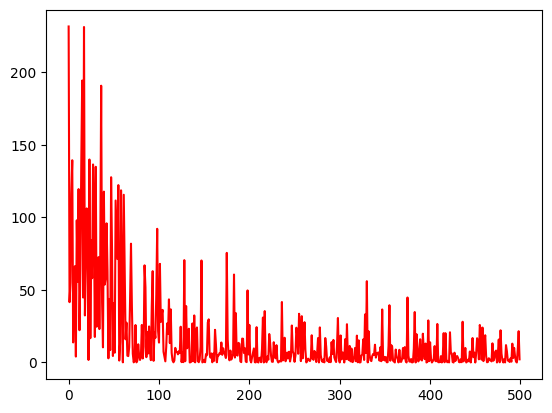

In [5]:
def stochastic_gradient_descent(X_data, y, n_epochs=50, learning_rate=0.00001):
    # thetas = np.random.randn(4, 1) #uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas] # chuyển thành array
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N) # In real application, you should use this code
            random_index = i # This code is used for this assignment only

            xi = X_b[random_index: random_index+1]
            yi = y[random_index: random_index+1]

            # Compute output
            oi = xi.dot(thetas)

            # Compute loss li
            li = ((oi - yi) ** 2) / 2

            # compute gradient for loss
            g_li = (oi - yi)

            # compute gradient
            gradients = xi.T.dot(g_li)

            # update thetas
            thetas = thetas - learning_rate * gradients

            # logging
            thetas_path.append(thetas)
            losses.append(li[0][0])

    return thetas_path, losses

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color='red')
plt.show()

In [6]:
sgd_theta1, losses1 = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses1))

6754.643359356192


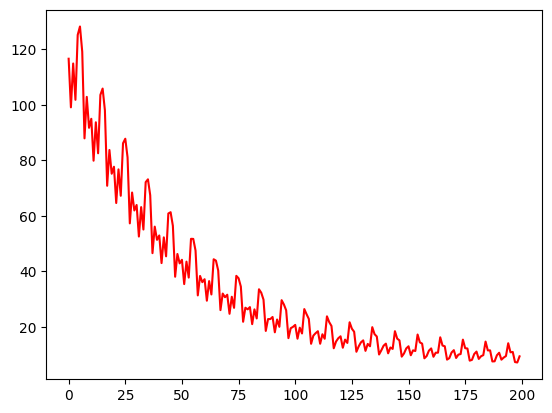

In [8]:
# mini_batch_gradient_descent

def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffled_indices = np. random . permutation (N) # uncomment this code for real application

        shuffled_indices = np. asarray ([21 , 144 , 17, 107 , 37, 115 , 167 , 31, 3,
        132 , 179 , 155 , 36, 191 , 182 , 170 , 27, 35, 162 , 25, 28, 73, 172 , 152 , 102 , 16,
        185 , 11, 1, 34, 177 , 29, 96, 22, 76, 196 , 6, 128 , 114 , 117 , 111 , 43, 57, 126 ,
        165 , 78, 151 , 104 , 110 , 53, 181 , 113 , 173 , 75, 23, 161 , 85, 94, 18, 148 , 190 ,
        169 , 149 , 79, 138 , 20, 108 , 137 , 93, 192 , 198 , 153 , 4, 45, 164 , 26, 8, 131 ,
        77, 80, 130 , 127 , 125 , 61, 10, 175 , 143 , 87, 33, 50, 54, 97, 9, 84, 188 , 139 ,
        195 , 72, 64, 194 , 44, 109 , 112 , 60, 86, 90, 140 , 171 , 59, 199 , 105 , 41, 147 ,
        92, 52, 124 , 71, 197 , 163 , 98, 189 , 103 , 51, 39, 180 , 74, 145 , 118 , 38, 47,
        174 , 100 , 184 , 183 , 160 , 69, 91, 82, 42, 89, 81, 186 , 136 , 63, 157 , 46, 67,
        129 , 120 , 116 , 32, 19, 187 , 70, 141 , 146 , 15, 58, 119 , 12, 95, 0, 40, 83, 24,
        168 , 150 , 178 , 49, 159 , 7, 193 , 48, 30, 14, 121 , 5, 142 , 65, 176 , 101 , 55,
        133 , 13, 106 , 66, 99, 68, 135 , 158 , 88, 62, 166 , 156 , 2, 134 , 56, 123 , 122 ,
        154])

        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i: i + minibatch_size]
            yi = y_shuffled[i: i + minibatch_size]

            # compute output
            output = xi.dot(thetas)

            # compute loss li
            loss = ((output - yi) ** 2) / 2

            # compute derivative of loss
            loss_grd = (output - yi) / minibatch_size

            # compute derivative of parameters
            gradients = xi.T.dot(loss_grd)

            # update thetas
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(np.sum(loss_mean))

    return thetas_path, losses


mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color='red')
plt.show()

In [9]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
print(round(sum(losses), 2))

8865.65


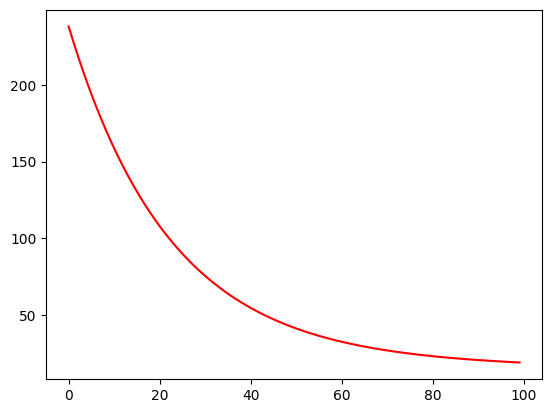

In [10]:
def batch_gradient_descent3(X_b, y, n_epochs=100, learning_rate=0.01):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for i in range(n_epochs):
        # compute output
        output = X_b.dot(thetas)

        # compute loss
        loss = (output - y) **2

        # compute loss's derivative
        loss_grd = (output - y) *2 / N

        # compute parameters' derivative
        gradients = X_b.T.dot(loss_grd)

        # update parameters
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)

    return thetas_path, losses

bgd_thetas, losses = batch_gradient_descent3(X_b, y, n_epochs=100, learning_rate=0.01)

x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()

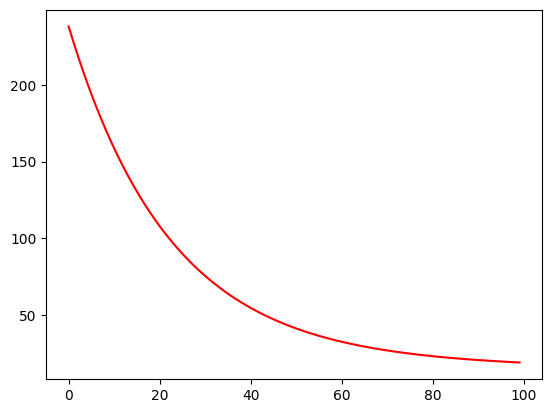

In [11]:
bgd_thetas, losses = batch_gradient_descent3(X_b, y, n_epochs=100, learning_rate=0.01)
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()

In [12]:
bgd_thetas, losses = batch_gradient_descent3(X_b, y, n_epochs=100, learning_rate=0.01)
print(round(sum(losses), 2))

6716.46


## Bài tập 2

2014-11-28 to 2022-03-01


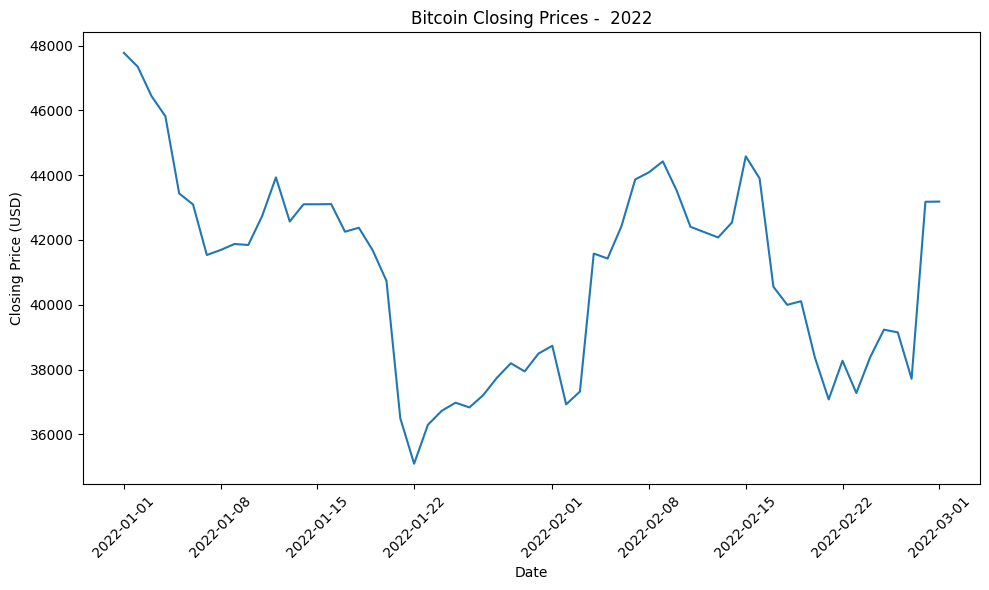

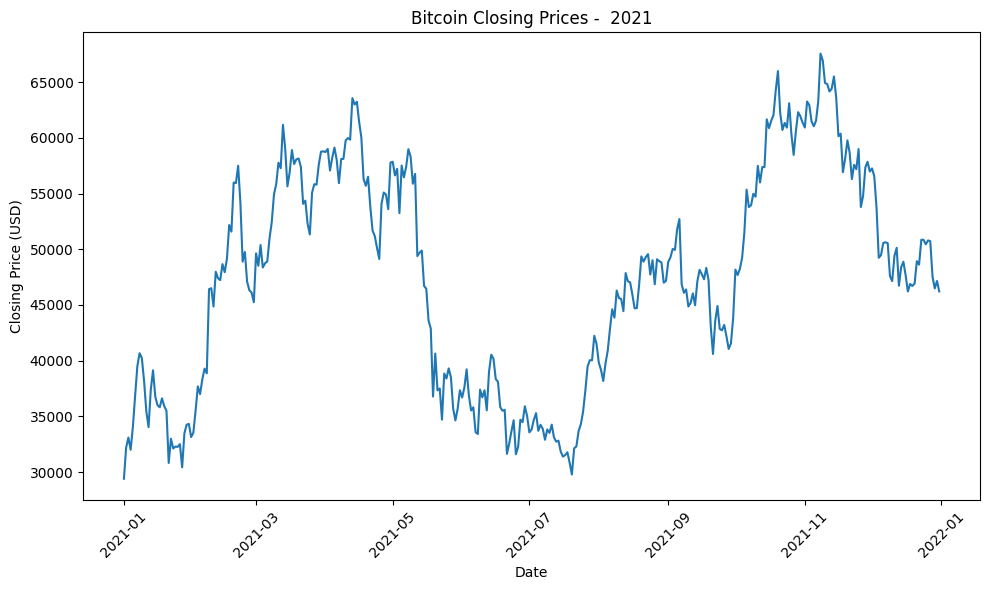

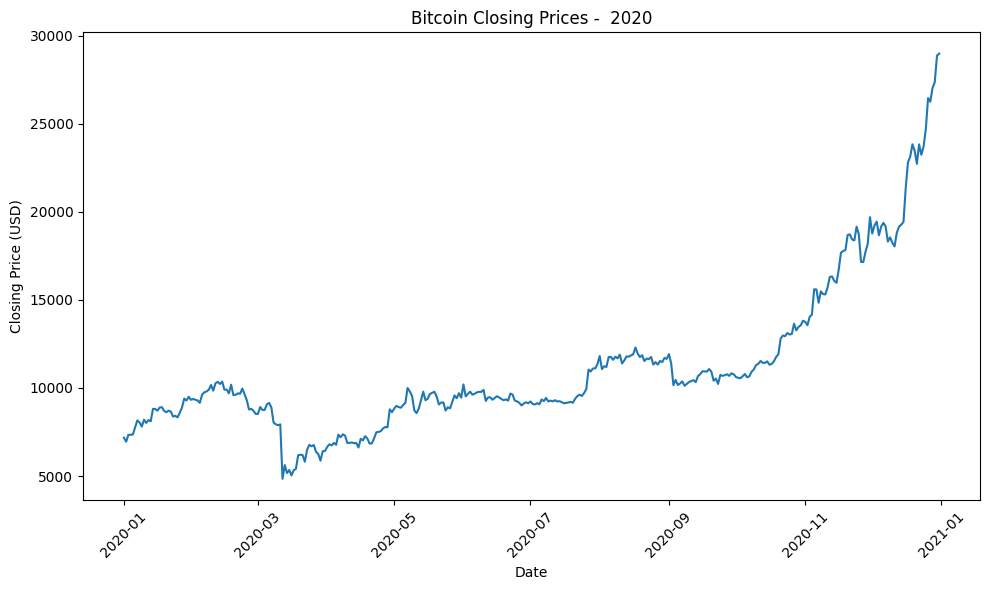

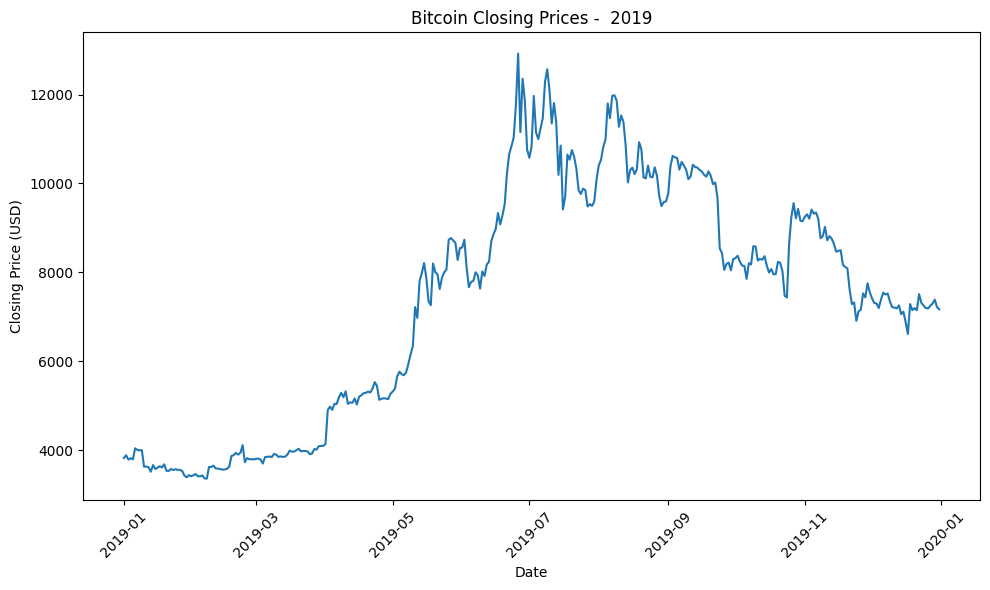

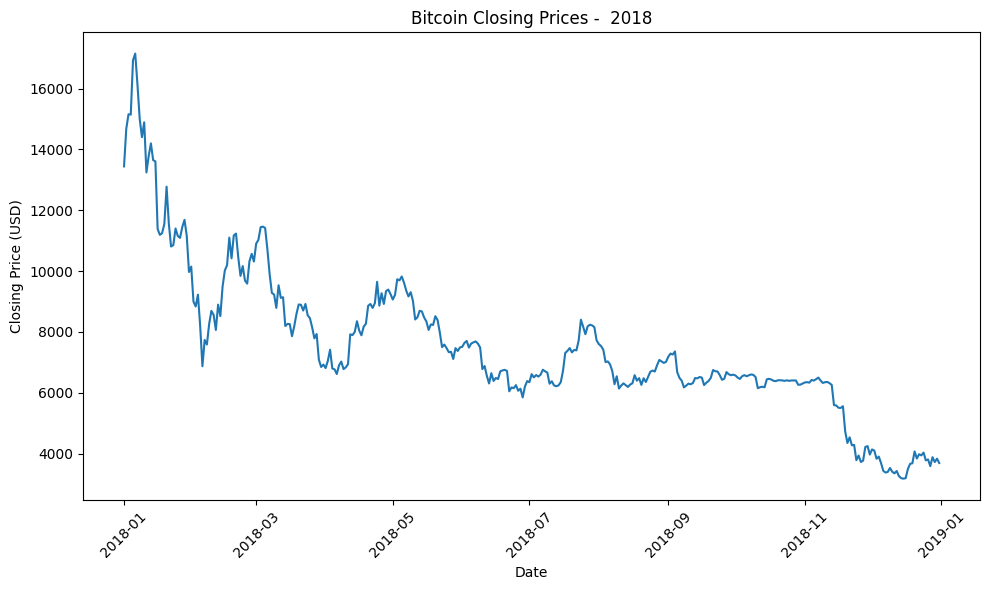

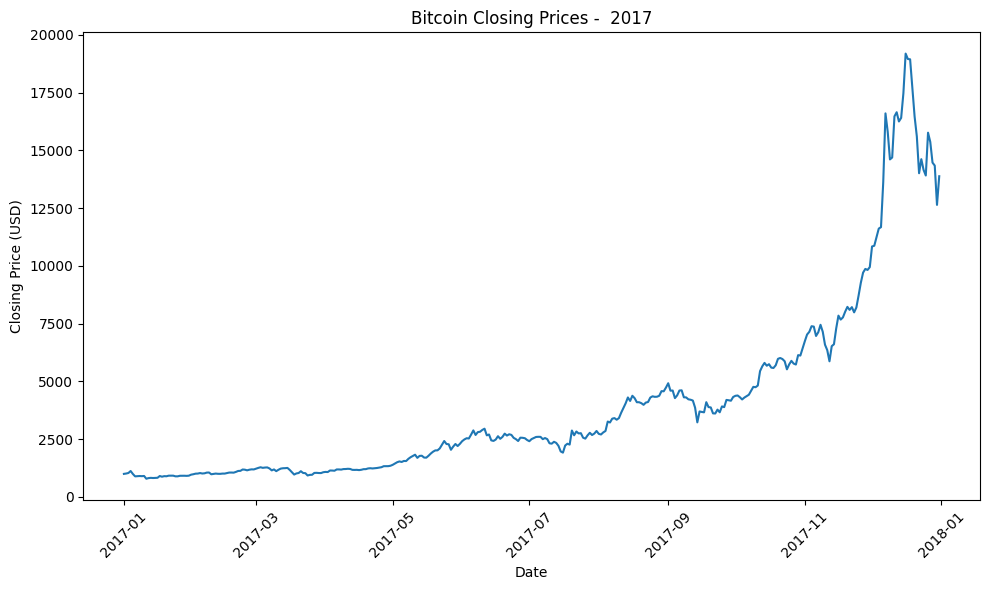

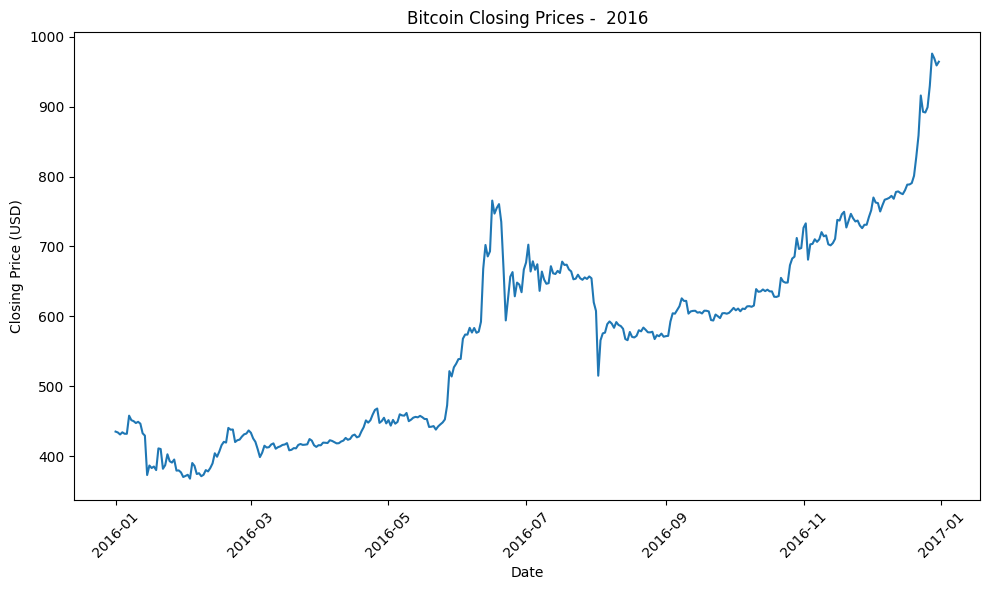

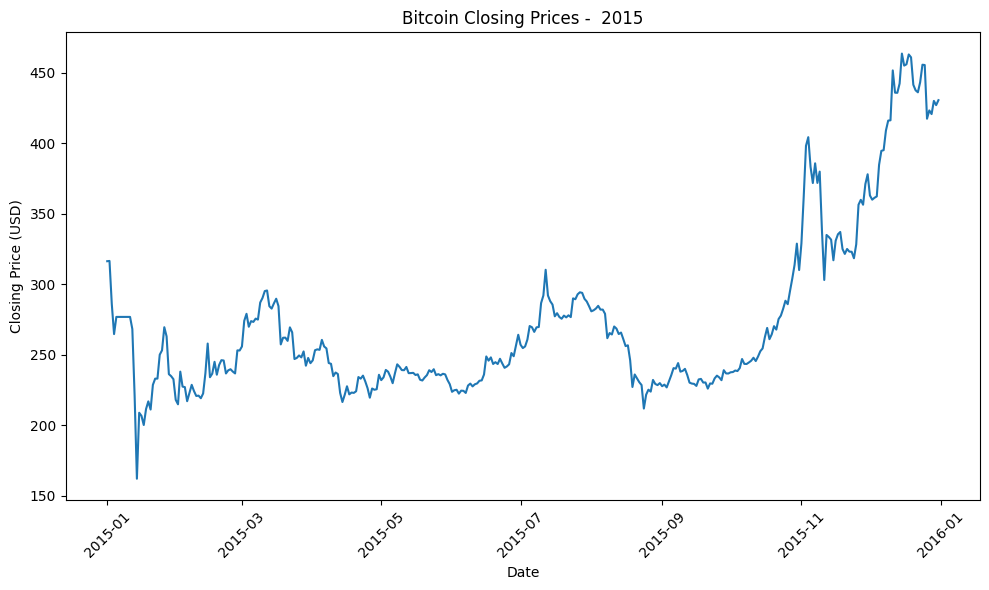

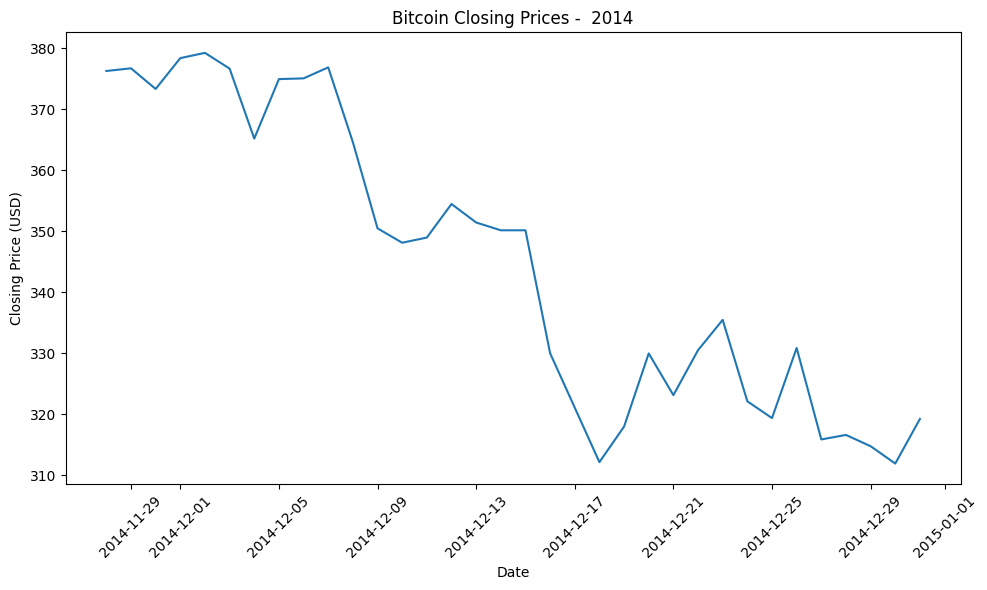

In [15]:
# Load data
df = pd.read_csv('./BTC-Daily.csv')

# remove duplicate rows
df = df.drop_duplicates()

# Range of dates coverd
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
unique_years = df['year'].unique()

for year in unique_years:
    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day

    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')

    # plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices -  {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [16]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.1 MB/s eta 0:00:00


In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

<ipython-input-23-6b874e3895bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


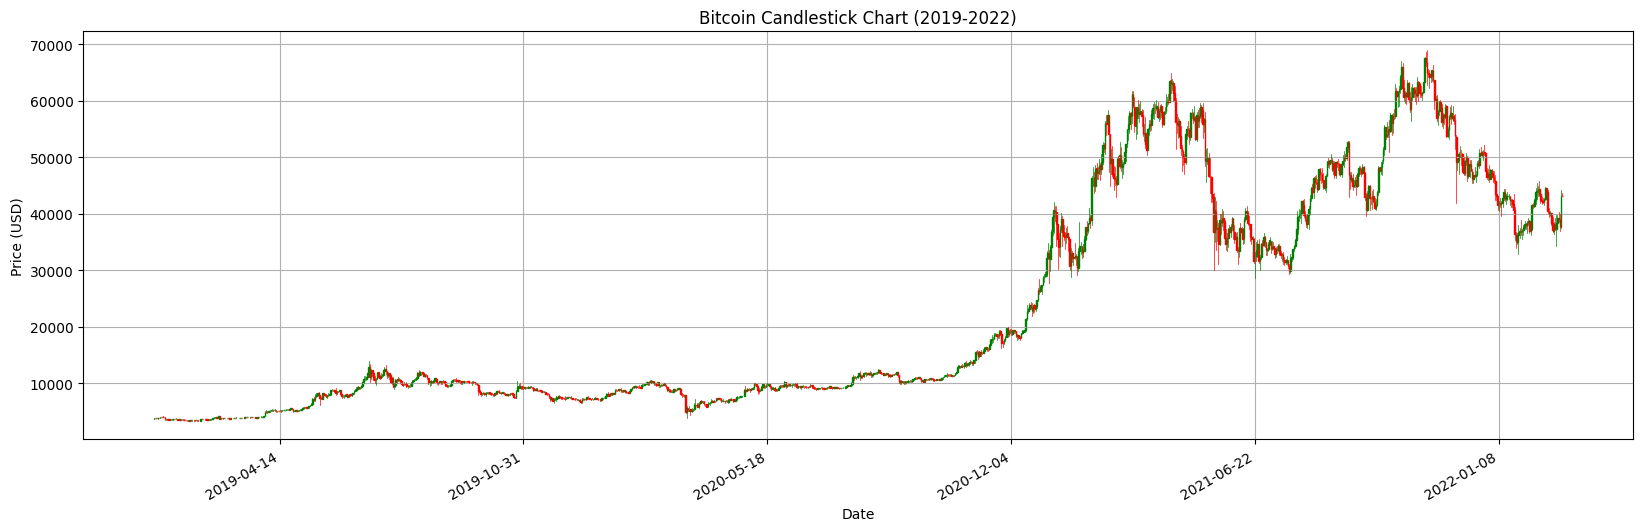

In [23]:
# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scalar = StandardScaler()

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []

    for _ in range(num_iterations):
        y_hat = predict(X, w, b)  # Make predictions
        dw, db, cost = gradient(y_hat, y, X)  # Calculate gradients
        w, b = update_weight(w, b, learning_rate, dw, db)  # Update weights and bias
        losses.append(cost)

    return w, b, losses


In [34]:
def predict(X, w, b):
    return X.dot(w) + b

def gradient(y_hat, y, x):
    loss = y_hat-y
    dw = x.T.dot(loss)/len(y)
    db = np.sum(loss)/len(y)
    cost = np.sum(loss**2)/(2*len(y))
    return (dw,db, cost)

def update_weights(w, b, lr, dw, db):
    w_new = w - lr * dw
    b_new = b - lr * db
    return w_new, b_new

In [35]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

NameError: name 'w' is not defined

<ipython-input-36-bc06c0963ed2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['predicted_close'] = df_2015['close'].shift(1)


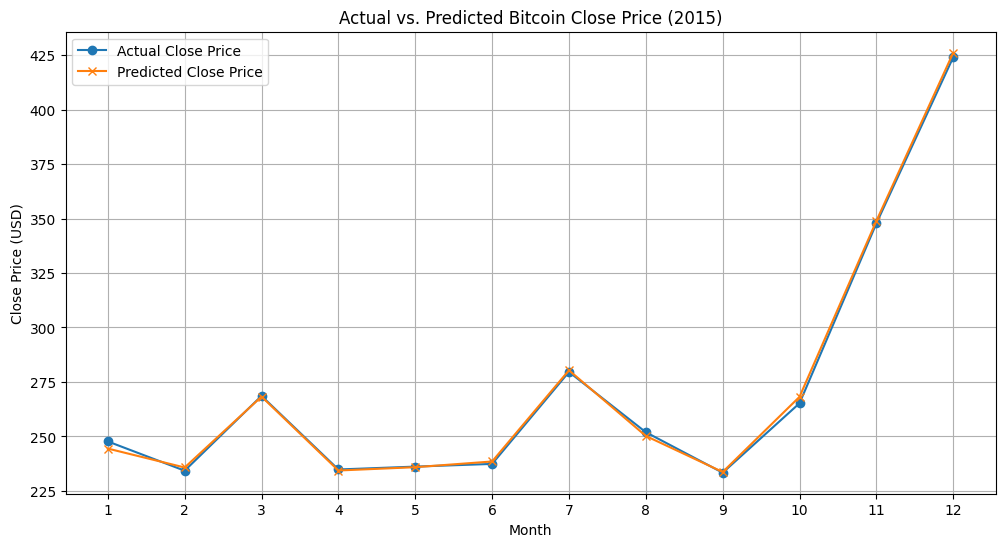

In [36]:
# Filter data for 2015
df_2015 = df[df['date'].dt.year == 2015]

# Group by month and get the mean of the actual and predicted close prices
monthly_actual = df_2015.groupby(df_2015['date'].dt.month)['close'].mean()

# Assuming you have a way to predict the close prices for 2015 (replace with your prediction method)
# For this example, I'll just use the previous day's close price as a simple prediction.
df_2015['predicted_close'] = df_2015['close'].shift(1)
monthly_predicted = df_2015.groupby(df_2015['date'].dt.month)['predicted_close'].mean()


# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_actual.index, monthly_actual.values, label='Actual Close Price', marker='o')
plt.plot(monthly_predicted.index, monthly_predicted.values, label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (2015)')
plt.xlabel('Month')
plt.ylabel('Close Price (USD)')
plt.xticks(monthly_actual.index)
plt.legend()
plt.grid(True)
plt.show()